<a href="https://colab.research.google.com/github/Akshaay23/NPL_PROJECTS/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import important dependency


In [99]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [22]:
# Load the dataset
df= pd.read_csv("/content/twitter_training.csv")
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [23]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

Delete the unwanted columns

In [24]:
df.drop(columns= ['2401'] , inplace = True)
df.head()

,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


# Rename the column

In [25]:
df.rename(columns={'Borderlands': 'Game_name',
                   'Positive': 'Sentiment',
                   'im getting on borderlands and i will murder you all ,': 'Tweet'}, inplace=True)

In [26]:
df.head()

,Game_name,Sentiment,Tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [27]:
df.shape

(74681, 3)

Handaling missing values

In [28]:
df.isna().sum()

,0
Game_name,0
Sentiment,0
Tweet,686


In [29]:
# Drop the missing values
df=df.dropna()
df.shape

(73995, 3)

Creating a new dataset

In [30]:
df.Sentiment.value_counts()

,count
Sentiment,
Negative,22358
Positive,20654
Neutral,18108
Irrelevant,12875


Why Use to create  Smaller Dataset?

Faster Experimentation

The original dataset (~23K+ rows) is large, making preprocessing, EDA, and model training slow.
A smaller dataset allows quicker iterations, making it easier to test different models and techniques.
Efficient Debugging

Large datasets make debugging harder and time-consuming.
A reduced dataset helps in identifying errors in preprocessing or model training before scaling up.

In [31]:
df_positive= df[df.Sentiment == 'Positive'].iloc[:3000]
df_negative= df[df.Sentiment == 'Negative'].iloc[:3000]
df_neutral= df[df.Sentiment == 'Neutral'].iloc[:3000]
df_irr= df[df.Sentiment == 'Irrelevant'].iloc[:3000]

In [33]:
df_=pd.concat([df_positive,df_negative,df_neutral,df_irr], axis=0)

In [34]:
df_.shape

(12000, 3)

In [35]:
df_.Sentiment.value_counts()

,count
Sentiment,
Positive,3000
Negative,3000
Neutral,3000
Irrelevant,3000


categorical to numerical data transformation

In [36]:
df_.Game_name.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)'],
      dtype=object)

In [39]:
game_df= (pd.get_dummies(df_['Game_name'])).astype('int')

In [40]:
game_df

,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Dota2,NBA2K,Overwatch,PlayStation5(PS5),Xbox(Xseries)
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
16513,0,0,0,0,0,0,1,0
16514,0,0,0,0,0,0,1,0
16515,0,0,0,0,0,0,1,0
16516,0,0,0,0,0,0,1,0


In [41]:
df_.drop(columns=['Game_name'], inplace=True)

In [42]:
df_.head()

,Sentiment,Tweet
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [43]:
df_.shape,game_df.shape

((12000, 2), (12000, 8))

Text Preprocessing

In [44]:
nlp=spacy.load('en_core_web_sm')

In [45]:
def lemmatization(text):
  doc=nlp(text)
  lemmalist= [word.lemma_ for word in doc]
  return " ".join(lemmalist)

In [47]:
df_['lemma']= df_['Tweet'].apply(lemmatization)

In [48]:
df_.head()

,Sentiment,Tweet,lemma
0,Positive,I am coming to the borders and I will kill you...,"I be come to the border and I will kill you all ,"
1,Positive,im getting on borderlands and i will kill you ...,"I m get on borderland and I will kill you all ,"
2,Positive,im coming on borderlands and i will murder you...,I m come on borderland and I will murder you a...
3,Positive,im getting on borderlands 2 and i will murder ...,I m get on borderland 2 and I will murder you ...
4,Positive,im getting into borderlands and i can murder y...,I m get into borderland and I can murder you a...


In [49]:
def remove_stopwords(text):
  doc =nlp(text)
  no_stopwords = [word.text for word in doc if not word.is_stop and not word.is_punct]
  return " ".join(no_stopwords)

In [50]:
df_['final'] = df_['lemma'].apply(remove_stopwords)

In [51]:
df_.head()

,Sentiment,Tweet,lemma,final
0,Positive,I am coming to the borders and I will kill you...,"I be come to the border and I will kill you all ,",come border kill
1,Positive,im getting on borderlands and i will kill you ...,"I m get on borderland and I will kill you all ,",m borderland kill
2,Positive,im coming on borderlands and i will murder you...,I m come on borderland and I will murder you a...,m come borderland murder
3,Positive,im getting on borderlands 2 and i will murder ...,I m get on borderland 2 and I will murder you ...,m borderland 2 murder
4,Positive,im getting into borderlands and i can murder y...,I m get into borderland and I can murder you a...,m borderland murder


In [53]:
df_.drop(columns=['Tweet','lemma'], inplace= True)
df_.head()

,Sentiment,final
0,Positive,come border kill
1,Positive,m borderland kill
2,Positive,m come borderland murder
3,Positive,m borderland 2 murder
4,Positive,m borderland murder


In [61]:
sentiment_df= pd.concat([df_, game_df], axis= 1)

In [62]:
sentiment_df.head()

,Sentiment,final,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Dota2,NBA2K,Overwatch,PlayStation5(PS5),Xbox(Xseries)
0,Positive,come border kill,0,1,0,0,0,0,0,0
1,Positive,m borderland kill,0,1,0,0,0,0,0,0
2,Positive,m come borderland murder,0,1,0,0,0,0,0,0
3,Positive,m borderland 2 murder,0,1,0,0,0,0,0,0
4,Positive,m borderland murder,0,1,0,0,0,0,0,0


In [63]:
df_.shape

(12000, 2)

In [64]:
df_.isna().sum()

,0
Sentiment,0
final,0


Dividing the dataset

In [65]:
X= sentiment_df.drop(columns= ['Sentiment'])
y= sentiment_df['Sentiment']

In [66]:
X.head()

,final,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Dota2,NBA2K,Overwatch,PlayStation5(PS5),Xbox(Xseries)
0,come border kill,0,1,0,0,0,0,0,0
1,m borderland kill,0,1,0,0,0,0,0,0
2,m come borderland murder,0,1,0,0,0,0,0,0
3,m borderland 2 murder,0,1,0,0,0,0,0,0
4,m borderland murder,0,1,0,0,0,0,0,0


TFIDF Vectorizer

In [69]:
tfidf = TfidfVectorizer()

In [70]:
tfidf.fit(X['final'])

TfidfVectorizer()

In [73]:
tfidf_matrix = tfidf.transform(X['final']).toarray()

In [74]:
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
vectorizer_df = pd.DataFrame(tfidf_matrix, columns=tfidf.get_feature_names_out())

In [76]:
vectorizer_df.head()

,00,000,01,02,03,03573057,0359873057,04,05,06,...,июля,лмаoooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo,овер,сетью,третьарце,угхх,хм,اللعبه,حبيت,خلاص
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
X.drop(columns = ["final"], inplace=True)

In [78]:
X.shape , vectorizer_df.shape

((12000, 8), (12000, 8554))

In [79]:
X = pd.concat([X, vectorizer_df], axis= 1)

In [80]:
X.head()

,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Dota2,NBA2K,Overwatch,PlayStation5(PS5),Xbox(Xseries),00,000,...,июля,лмаoooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo,овер,сетью,третьарце,угхх,хм,اللعبه,حبيت,خلاص
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
X.isna().sum()

,0
Amazon,929
Borderlands,929
CallOfDutyBlackopsColdWar,929
Dota2,929
NBA2K,929
...,...
угхх,929
хм,929
اللعبه,929
حبيت,929


In [82]:
X= X.fillna(0)

In [83]:
X.isna().sum()

,0
Amazon,0
Borderlands,0
CallOfDutyBlackopsColdWar,0
Dota2,0
NBA2K,0
...,...
угхх,0
хм,0
اللعبه,0
حبيت,0


In [86]:
X.shape ,y.shape

((12929, 8562), (12000,))

In [87]:
X= X.iloc[:12000]

In [88]:
X.shape ,y.shape

((12000, 8562), (12000,))

Divide the data set into train and test

In [89]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [91]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9600, 8562), (2400, 8562), (9600,), (2400,))

Building a model

In [93]:
model= RandomForestClassifier(n_jobs=1,random_state=42,n_estimators=200)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=1, random_state=42)

In [94]:
pred = model.predict(X_test)

In [95]:
y_test[:5]

,Sentiment
5198,Positive
1852,Neutral
4245,Positive
1127,Irrelevant
853,Positive


In [96]:
pred[:5]

array(['Negative', 'Neutral', 'Irrelevant', 'Positive', 'Positive'],
      dtype=object)

In [97]:
accuracy_score(y_test,pred) * 100

71.375

In [98]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

  Irrelevant       0.72      0.70      0.71       596
    Negative       0.72      0.71      0.71       624
     Neutral       0.72      0.71      0.72       568
    Positive       0.69      0.74      0.71       612

    accuracy                           0.71      2400
   macro avg       0.71      0.71      0.71      2400
weighted avg       0.71      0.71      0.71      2400



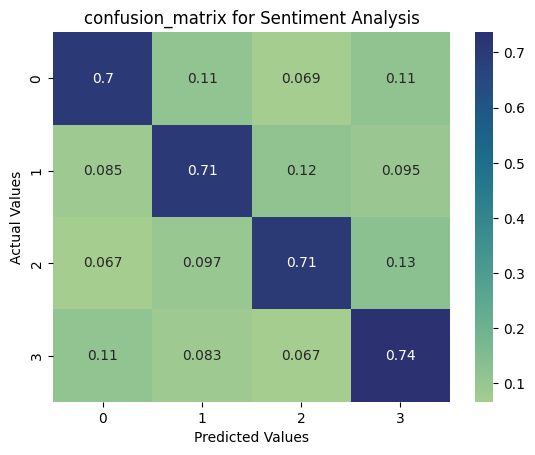

In [103]:
cf = confusion_matrix(y_test,pred,normalize='true')
sns.heatmap(cf, annot= True, cmap = 'crest');
plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');
plt.title('confusion_matrix for Sentiment Analysis');